# Проверка статистических гипотез на данных сервиса аренды самокатов GoFast

# Исходные данные
Данные о некоторых пользователях сервиса Go Fast из нескольких городов, а также об их поездках. 
Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- **без подписки:**
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
- **с подпиской Ultra:**
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

**У нас есть 3 датафрейма**
- Информация о пользователях (users)
- Информация о поездках (rides)
- Информация о видах подпсики (subscriptions)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-.-Загрузка-данных" data-toc-modified-id="Шаг-.-Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг . Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Выведите-первые-строки-каждого-набора-данных.-Изучите-общую-информацию-о-каждом-датафрейме." data-toc-modified-id="Выведите-первые-строки-каждого-набора-данных.-Изучите-общую-информацию-о-каждом-датафрейме.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.</a></span></li></ul></li><li><span><a href="#Шаг.-Предобработка-данных" data-toc-modified-id="Шаг.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Приведите-столбец-date-к-типу-даты-pandas." data-toc-modified-id="Приведите-столбец-date-к-типу-даты-pandas.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведите столбец date к типу даты pandas.</a></span></li><li><span><a href="#Создайте-новый-столбец-с-номером-месяца-на-основе-столбца-date." data-toc-modified-id="Создайте-новый-столбец-с-номером-месяца-на-основе-столбца-date.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создайте новый столбец с номером месяца на основе столбца date.</a></span></li><li><span><a href="#Проверьте-наличие-пропущенных-значений-и-дубликатов-в-датафреймах.-Обработайте-их,-если-такие-значения-присутствуют." data-toc-modified-id="Проверьте-наличие-пропущенных-значений-и-дубликатов-в-датафреймах.-Обработайте-их,-если-такие-значения-присутствуют.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.</a></span></li></ul></li><li><span><a href="#Шаг.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг.-Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг. Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Частота-встречаемости-городов" data-toc-modified-id="Частота-встречаемости-городов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Частота встречаемости городов</a></span></li><li><span><a href="#Соотношение-пользователей-с-подпиской-и-без-подписки;" data-toc-modified-id="Соотношение-пользователей-с-подпиской-и-без-подписки;-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Соотношение пользователей с подпиской и без подписки;</a></span></li><li><span><a href="#Возраст-пользователей" data-toc-modified-id="Возраст-пользователей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Возраст пользователей</a></span></li><li><span><a href="#Расстояние,-которое-пользователь-преодолел-за-одну-поездку" data-toc-modified-id="Расстояние,-которое-пользователь-преодолел-за-одну-поездку-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расстояние, которое пользователь преодолел за одну поездку</a></span></li><li><span><a href="#Продолжительность-поездок" data-toc-modified-id="Продолжительность-поездок-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Продолжительность поездок</a></span></li><li><span><a href="#Возраст-пользователей" data-toc-modified-id="Возраст-пользователей-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Возраст пользователей</a></span></li></ul></li><li><span><a href="#Шаг.-Объединение-данных" data-toc-modified-id="Шаг.-Объединение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг. Объединение данных</a></span><ul class="toc-item"><li><span><a href="#Объедините-данные-о-пользователях,-поездках-и-подписках-в-один-датафрейм.-Для-этого-воспользуйтесь-методом-merge()." data-toc-modified-id="Объедините-данные-о-пользователях,-поездках-и-подписках-в-один-датафрейм.-Для-этого-воспользуйтесь-методом-merge().-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().</a></span></li><li><span><a href="#Создайте-ещё-два-датафрейма-из-датафрейма,-созданного-на-этапе-4.1:" data-toc-modified-id="Создайте-ещё-два-датафрейма-из-датафрейма,-созданного-на-этапе-4.1:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:</a></span></li><li><span><a href="#Визуализируйте-информацию-о-расстоянии-и-времени-поездок-для-пользователей-обеих-категорий." data-toc-modified-id="Визуализируйте-информацию-о-расстоянии-и-времени-поездок-для-пользователей-обеих-категорий.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.</a></span><ul class="toc-item"><li><span><a href="#Среднее-расстояние,-которое-пользователь-преодолевает-за-одну-поездку" data-toc-modified-id="Среднее-расстояние,-которое-пользователь-преодолевает-за-одну-поездку-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Среднее расстояние, которое пользователь преодолевает за одну поездку</a></span></li><li><span><a href="#Распределение-длительности-поездки-для-обоих-групп" data-toc-modified-id="Распределение-длительности-поездки-для-обоих-групп-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Распределение длительности поездки для обоих групп</a></span></li><li><span><a href="#Распределение-дистанций-пользователей-для-обоих-групп" data-toc-modified-id="Распределение-дистанций-пользователей-для-обоих-групп-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Распределение дистанций пользователей для обоих групп</a></span></li></ul></li></ul></li><li><span><a href="#Шаг.-Подсчёт-выручки" data-toc-modified-id="Шаг.-Подсчёт-выручки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг. Подсчёт выручки</a></span><ul class="toc-item"><li><span><a href="#Создайте-датафрейм-с-агрегированными-данными-о-поездках-на-основе-датафрейма-с-объединёнными-данными-из-шага-4:-найдите-суммарное-расстояние,-количество-поездок-и-суммарное-время-для-каждого-пользователя-за-каждый-месяц." data-toc-modified-id="Создайте-датафрейм-с-агрегированными-данными-о-поездках-на-основе-датафрейма-с-объединёнными-данными-из-шага-4:-найдите-суммарное-расстояние,-количество-поездок-и-суммарное-время-для-каждого-пользователя-за-каждый-месяц.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.</a></span></li><li><span><a href="#В-этот-же-датафрейм-добавьте-столбец-с-помесячной-выручкой,-которую-принёс-каждый-пользователь.-Для-этого-обратитесь-к-информации-об-условиях-оплаты-для-подписчиков-и-тех,-у-кого-нет-подписки.-Продолжительность-каждой-поездки-в-каждой-строке-исходного-датафрейма-для-подсчёта-стоимости-округляется-до-следующего-целого-числа:-например,-значения-25.3,25.5-и-26.0-должны-быть-преобразованы-к-26" data-toc-modified-id="В-этот-же-датафрейм-добавьте-столбец-с-помесячной-выручкой,-которую-принёс-каждый-пользователь.-Для-этого-обратитесь-к-информации-об-условиях-оплаты-для-подписчиков-и-тех,-у-кого-нет-подписки.-Продолжительность-каждой-поездки-в-каждой-строке-исходного-датафрейма-для-подсчёта-стоимости-округляется-до-следующего-целого-числа:-например,-значения-25.3,25.5-и-26.0-должны-быть-преобразованы-к-26-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3,25.5 и 26.0 должны быть преобразованы к 26</a></span></li></ul></li><li><span><a href="#Шаг.-Проверка-гипотез" data-toc-modified-id="Шаг.-Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг. Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Важно-понять,-тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки?-Если-да,-то-пользователи-с-подпиской-могут-быть-«выгоднее»-для-компании.-Проверьте-гипотезу.-Используйте-исходные-данные-о-продолжительности-каждой-сессии-—-отдельно-для-подписчиков-и-тех,-у-кого-нет-подписки." data-toc-modified-id="Важно-понять,-тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки?-Если-да,-то-пользователи-с-подпиской-могут-быть-«выгоднее»-для-компании.-Проверьте-гипотезу.-Используйте-исходные-данные-о-продолжительности-каждой-сессии-—-отдельно-для-подписчиков-и-тех,-у-кого-нет-подписки.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.</a></span></li><li><span><a href="#Расстояние-одной-поездки-в-3130-метров-—-оптимальное-с-точки-зрения-износа-самоката.-Можно-ли-сказать,-что-среднее-расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку,-не-превышает-3130-метров?-Проверьте-гипотезу-и-сделайте-выводы." data-toc-modified-id="Расстояние-одной-поездки-в-3130-метров-—-оптимальное-с-точки-зрения-износа-самоката.-Можно-ли-сказать,-что-среднее-расстояние,-которое-проезжают-пользователи-с-подпиской-за-одну-поездку,-не-превышает-3130-метров?-Проверьте-гипотезу-и-сделайте-выводы.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.</a></span></li><li><span><a href="#Проверьте-гипотезу-о-том,-будет-ли-помесячная-выручка-от-пользователей-с-подпиской-по-месяцам-выше,-чем-выручка-от-пользователей-без-подписки.-Сделайте-вывод." data-toc-modified-id="Проверьте-гипотезу-о-том,-будет-ли-помесячная-выручка-от-пользователей-с-подпиской-по-месяцам-выше,-чем-выручка-от-пользователей-без-подписки.-Сделайте-вывод.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Представьте-такую-ситуацию:-техническая-команда-сервиса-обновила-сервера,-с-которыми-взаимодействует-мобильное-приложение.-Она-надеется,-что-из-за-этого-количество-обращений-в-техподдержку-значимо-снизилось.-Некоторый-файл-содержит-для-каждого-пользователя-данные-о-количестве-обращений-до-обновления-и-после-него.-Какой-тест-вам-понадобился-бы-для-проверки-этой-гипотезы?" data-toc-modified-id="Представьте-такую-ситуацию:-техническая-команда-сервиса-обновила-сервера,-с-которыми-взаимодействует-мобильное-приложение.-Она-надеется,-что-из-за-этого-количество-обращений-в-техподдержку-значимо-снизилось.-Некоторый-файл-содержит-для-каждого-пользователя-данные-о-количестве-обращений-до-обновления-и-после-него.-Какой-тест-вам-понадобился-бы-для-проверки-этой-гипотезы?-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?</a></span><ul class="toc-item"><li><span><a href="#Шаг-7.-Распределения" data-toc-modified-id="Шаг-7.-Распределения-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Шаг 7. Распределения</a></span></li></ul></li></ul></li></ul></div>

## Шаг. Импорты библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
import seaborn as sns

## Шаг . Загрузка данных

In [2]:
users=pd.read_csv('/datasets/users_go.csv')

In [3]:
rides=pd.read_csv('/datasets/rides_go.csv')

In [4]:
subscriptions= pd.read_csv('/datasets/subscriptions_go.csv')

### Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [5]:
#Изучим данные из трех датафреймов
display(users.head())
users.info()

display(rides.head())
rides.info()

display(subscriptions.head())
subscriptions.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


В итоге, у нас 1564 уникальных пользователя, которые совершили 18067 поездок. Это подтверждает и столбец user_id
типы данных в целом совпадают, кроме даты, наименования столбцов нас удовлетворяют.

## Шаг. Предобработка данных

### Приведите столбец date к типу даты pandas.


In [6]:
rides['date'] = pd.to_datetime(rides['date'], errors='coerce')
display(rides.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

Теперь столбец с датой имеет подходящий формат

### Создайте новый столбец с номером месяца на основе столбца date.


In [7]:
rides['month'] = rides['date'].dt.month
rides['year'] = rides['date'].dt.year

display(rides.head())

,user_id,distance,duration,date,month,year
0,1,4409.919140,25.599769,2021-01-01,1,2021
1,1,2617.592153,15.816871,2021-01-18,1,2021
2,1,754.159807,6.232113,2021-04-20,4,2021
3,1,2694.783254,18.511000,2021-08-11,8,2021
4,1,4028.687306,26.265803,2021-08-28,8,2021


In [8]:
data_year=rides['year'].unique()
display(data_year)

array([2021])

Уникальных значений нет, данные от 2021 года. Отдельно выделены столбцы с месяуем, указан порядковый номер месяца, а также выделен год. 

### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

#Ищем пропуски
Я посмотрела методом info, пропусков нет :)

In [9]:
missing_values_users = users.isnull().sum()
missing_values_rides = rides.isnull().sum()
missing_values_subscriptions= subscriptions.isnull().sum()
display(missing_values_users)

display(missing_values_rides)

display(missing_values_subscriptions)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
year        0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Ищем дубликаты**

In [10]:

duplicates_users = users.duplicated().sum()
duplicates_rides = rides.duplicated().sum()
duplicates_subscriptions = subscriptions.duplicated().sum()

display(duplicates_users)

display(duplicates_rides)

display(duplicates_subscriptions)

31

0

0

In [11]:
duplicates_users = users[users.duplicated()]
display('Все дубликаты:', duplicates_users.head(31))

'Все дубликаты:'

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [12]:
#Избавляемся от дубликатов
users = users.drop_duplicates()
duplicates_users = users.duplicated().sum()
display(duplicates_users)

0

Пропуски не обнаружены, выявленные дубликаты удалены

## Шаг. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:

### Частота встречаемости городов

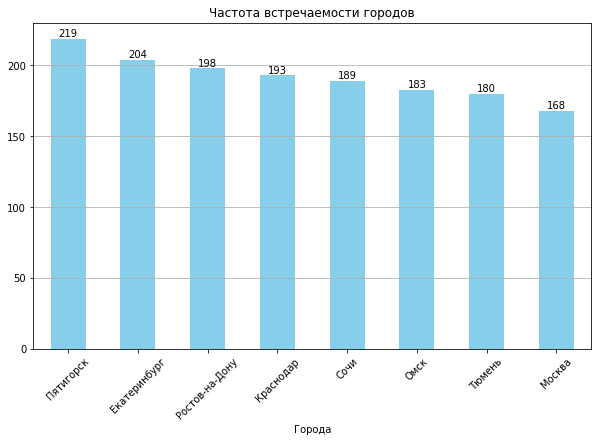

'Процентное соотношение городов в таблице:'

Пятигорск         14.276402
Екатеринбург      13.298566
Ростов-на-Дону    12.907432
Краснодар         12.581486
Сочи              12.320730
Омск              11.929596
Тюмень            11.734029
Москва            10.951760
Name: city, dtype: float64

In [13]:
city_counts = users['city'].value_counts()
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
total_users = users.shape[0]
city_percentage = (city_counts / total_users) * 100

ax = city_counts.plot(kind='bar', color='skyblue')
plt.title('Частота встречаемости городов')
plt.xlabel('Города')
plt.xticks(rotation=45)
plt.grid(axis='y')
for idx, value in enumerate(city_counts):
    ax.text(idx, value, str(value), ha='center', va='bottom')
plt.show()

display('Процентное соотношение городов в таблице:', 
      city_percentage)

Больше всего пользователей наблюдается в южном городе Пятигорске

### Соотношение пользователей с подпиской и без подписки;

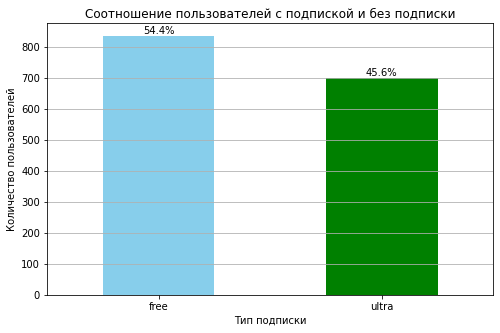

'Процентное соотношение пользователей с подпиской и без нее:'

free     54.432855
ultra    45.567145
Name: subscription_type, dtype: float64

In [14]:
subscription_counts = users['subscription_type'].value_counts()
plt.figure(figsize=(8, 5))

total_subscription = users.shape[0] #Считаем процентное соотношение пользователей с подпиской и без нее

subscription_percentage = (subscription_counts / total_subscription) * 100
ax = subscription_counts.plot(kind='bar', color=['skyblue', 'green'])


plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0)
plt.grid(axis='y')

for idx, value in enumerate(subscription_counts):
    ax.text(idx, value + 0.1, f"{subscription_percentage[idx]:.1f}%", ha='center', va='bottom')
plt.show()

display('Процентное соотношение пользователей с подпиской и без нее:',subscription_percentage)

Больше половины пользователей всё еще не готовы платить за подписку

### Возраст пользователей

Рассмотрим средний возраст всех пользователей вне зависимости от наличия у них подписки

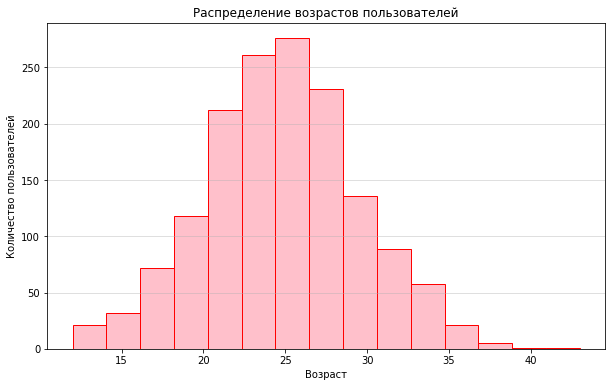

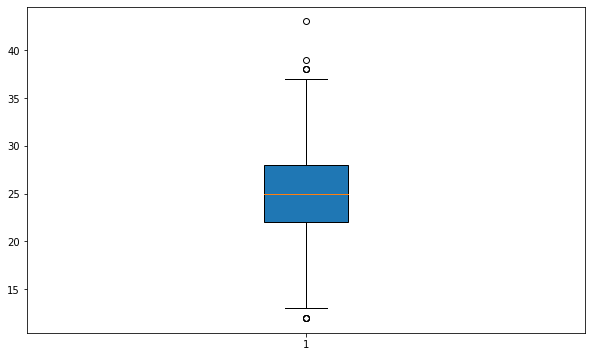

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [15]:
#Для этого построим гистограмму
plt.figure(figsize=(10, 6))

plt.hist(users['age'], bins=15, color='pink', edgecolor='red')

plt.title('Распределение возрастов пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.5)
plt.show()

#И диаграмму ящик с усами
plt.figure(figsize=(10, 6))
plt.boxplot(users['age'], patch_artist=True)
plt.show()

display(users['age'].describe())

Видим несколько выбросов. В среднем, пользователям самокатов ~25 лет. Обратила внимание на самого молодого пользователя, ему 12 лет, самому взрослоу пользователю - 43 года.

### Расстояние, которое пользователь преодолел за одну поездку
В данном разделе рассмотрим среднее расстояние, которое пользователь преодолевает за одну поездку.
Тоже пока без разделения на ultra и free


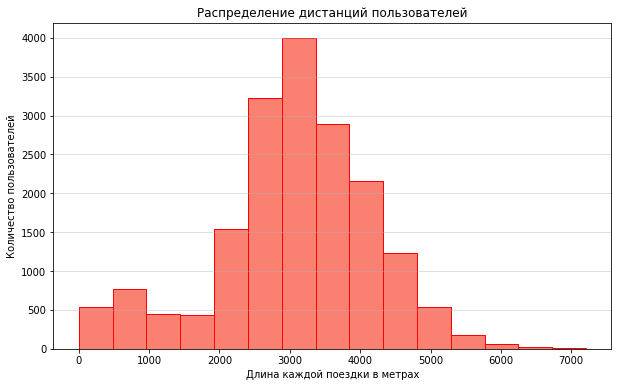

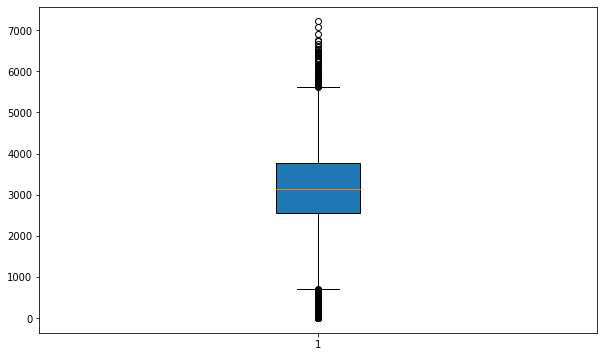

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


In [16]:
#Для этого построим гистограмму
plt.figure(figsize=(10, 6))

plt.hist(rides['distance'], bins=15, color='salmon', edgecolor='red')

plt.title('Распределение дистанций пользователей')
plt.xlabel('Длина каждой поездки в метрах')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.5)
plt.show()

#И диаграмму ящик с усами
plt.figure(figsize=(10, 6))
plt.boxplot(rides['distance'], patch_artist=True)
plt.show()

print(rides['distance'].describe())

Наблюдается много выбросов, но в среднем, пользователи берут самокаты на расстояния около 3 км, медианное значние - 3133 метра (или 3,233 км), среднее значение 3070 метров.

### Продолжительность поездок
Посмотрим среднюю продолжительность поездок вне зависимости от типа подпсики


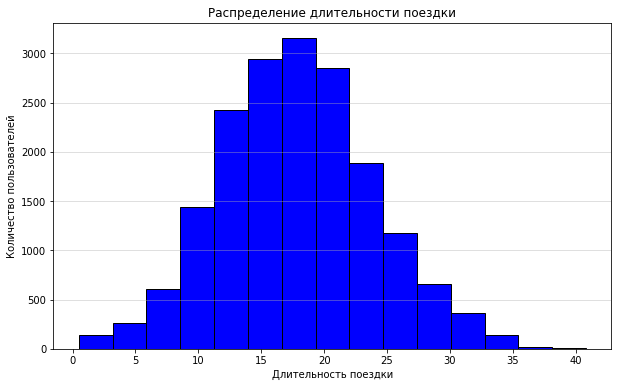

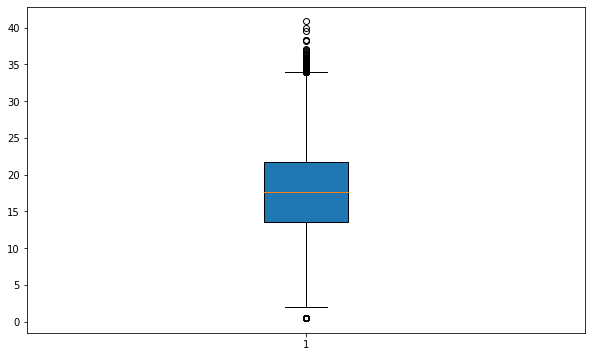

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


In [17]:
#Для этого построим гистограмму
plt.figure(figsize=(10, 6))

plt.hist(rides['duration'], bins=15, color='blue', edgecolor='black')

plt.title('Распределение длительности поездки')
plt.xlabel('Длительность поездки')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.5)
plt.show()

#И диаграмму ящик с усами
plt.figure(figsize=(10, 6))
plt.boxplot(rides['duration'], patch_artist=True)
plt.show()

print(rides['duration'].describe())

Средняя продолжительность поездки составляет ~17,7 минут. Стандартное отклонениет составляет 6,09 - можно сказать, что данные достаточно варьируются.

**Средняя скорость пользователей**

Попробуем рассчитать скорость

### Возраст пользователей

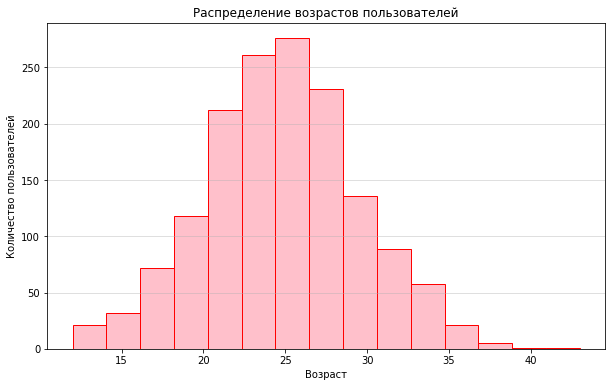

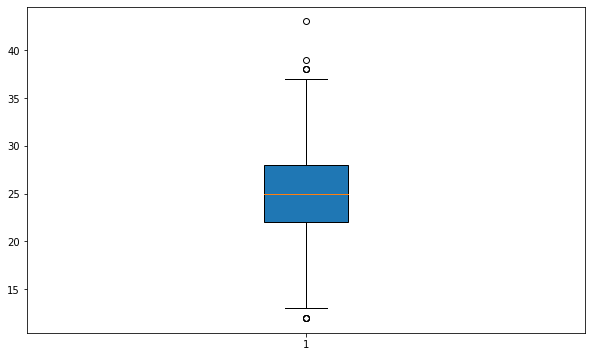

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [18]:
#Для этого построим гистограмму
plt.figure(figsize=(10, 6))

plt.hist(users['age'], bins=15, color='pink', edgecolor='red')

plt.title('Распределение возрастов пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.5)
plt.show()

#И диаграмму ящик с усами
plt.figure(figsize=(10, 6))
plt.boxplot(users['age'], patch_artist=True)
plt.show()

display(users['age'].describe())

## Шаг. Объединение данных

### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [19]:
merged_result = pd.merge(users, subscriptions, on='subscription_type', how='left') #Объединяем пользователей с подписками
merged_df = pd.merge(merged_result, rides, on='user_id', how='left') #Добавляем к первой таблице информацию о поездках

display(merged_df.head(15))

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month,year
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1,2021
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1,2021
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4,2021
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8,2021
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8,2021
5,1,Кира,22,Тюмень,ultra,6,0,199,2770.890808,16.650138,2021-10-09,10,2021
6,1,Кира,22,Тюмень,ultra,6,0,199,3039.020292,14.927879,2021-10-19,10,2021
7,1,Кира,22,Тюмень,ultra,6,0,199,2842.118050,23.117468,2021-11-06,11,2021
8,1,Кира,22,Тюмень,ultra,6,0,199,3412.690668,15.238072,2021-11-14,11,2021
9,1,Кира,22,Тюмень,ultra,6,0,199,748.690645,15.041884,2021-11-22,11,2021


### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;
с данными о пользователях с подпиской.

In [20]:
users_without = merged_df[merged_df['subscription_type'] == 'free']
display(users_without.head())

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month,year
6500,700,Айдар,22,Омск,free,8,50,0,2515.690719,14.944286,2021-01-02,1,2021
6501,700,Айдар,22,Омск,free,8,50,0,846.932642,16.234663,2021-02-01,2,2021
6502,700,Айдар,22,Омск,free,8,50,0,4004.434142,20.016628,2021-02-04,2,2021
6503,700,Айдар,22,Омск,free,8,50,0,1205.911290,9.782872,2021-02-10,2,2021
6504,700,Айдар,22,Омск,free,8,50,0,3047.379435,17.427673,2021-02-14,2,2021


In [21]:
users_with_fees = merged_df[merged_df['subscription_type'] == 'ultra']
display(users_with_fees.head())

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month,year
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1,2021
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1,2021
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4,2021
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8,2021
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8,2021


Теперь у нас есть два датафрейма, можно было разделить по subscription_fee еще

### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.


#### Среднее расстояние, которое пользователь преодолевает за одну поездку

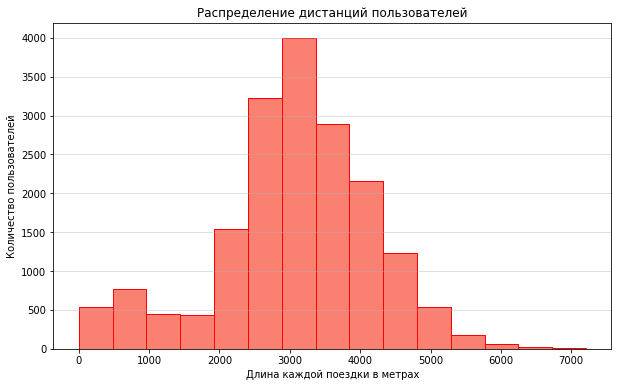

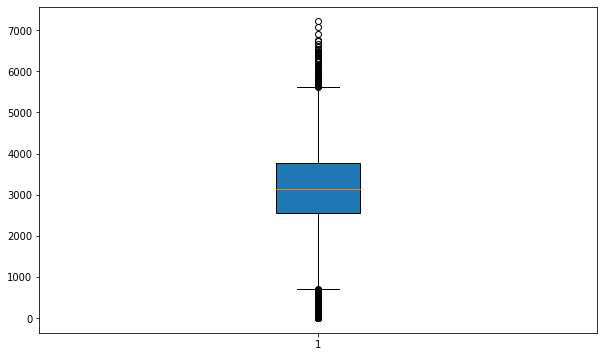

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


In [22]:
#Для этого построим гистограмму
plt.figure(figsize=(10, 6))

plt.hist(rides['distance'], bins=15, color='salmon', edgecolor='red')

plt.title('Распределение дистанций пользователей')
plt.xlabel('Длина каждой поездки в метрах')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.5)
plt.show()

#И диаграмму ящик с усами
plt.figure(figsize=(10, 6))
plt.boxplot(rides['distance'], patch_artist=True)
plt.show()

print(rides['distance'].describe())

#### Распределение длительности поездки для обоих групп

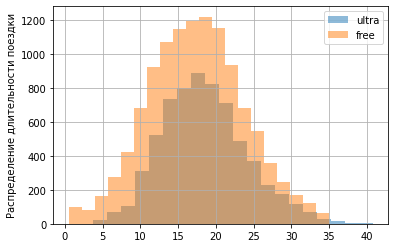

'Без подписки'

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

'С подпиской'

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [23]:
# распределение 1 (в label указываем название группы, которое отразится в легенде, alpha - прозрачность заливки)
users_with_fees['duration'].hist(bins=20, label = 'ultra', alpha=0.5)    

# распределение 2
users_without['duration'].hist(bins=20, label = 'free', alpha=0.5)    

# выводим легенду
plt.legend()
plt.ylabel('Распределение длительности поездки')
# выводим график без технических строк
plt.show()

display('Без подписки',users_without['duration'].describe())
display('С подпиской', users_with_fees['duration'].describe())

Построим диаграмму "ящик с усами"

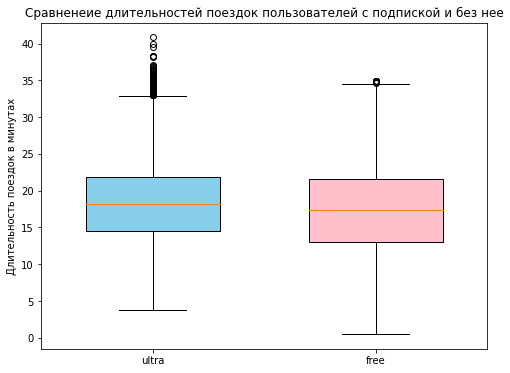

In [24]:
# Пример данных
data1 = users_with_fees['duration']
data2 = users_without['duration']

# Создание графика с двумя boxplot
plt.figure(figsize=(8, 6))

# Первый boxplot
plt.boxplot(data1, positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor="skyblue"))

# Второй boxplot
plt.boxplot(data2, positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor="pink"))

# Настройка осей и меток
plt.xticks([1, 2], ['ultra', 'free'])
plt.ylabel('Длительность поездок в минутах')
plt.title('Сравненеие длительностей поездок пользователей с подпиской и без нее')

plt.show()

Наблюдается много выбросов для подписчиков ультры, то есть они чаще выбирают использовать самокаты для длительных поездок

Средняя продолжительность поездки пользователей с подпиской выше (18,54 мин), чем у пользователей без подписки (17,39 мин)

#### Распределение дистанций пользователей для обоих групп

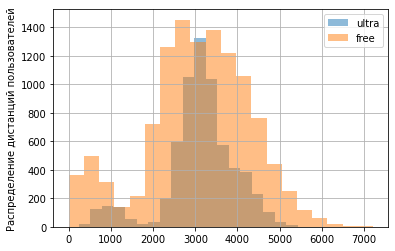

'Без подписки'

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

'С подпиской'

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [25]:
# распределение 1 (в label указываем название группы, которое отразится в легенде, alpha - прозрачность заливки)
users_with_fees['distance'].hist(bins=20, label = 'ultra', alpha=0.5)    

# распределение 2
users_without['distance'].hist(bins=20, label = 'free', alpha=0.5)    

plt.legend()
plt.ylabel('Распределение дистанций пользователей')

plt.show()

display('Без подписки',users_without['distance'].describe())
display('С подпиской', users_with_fees['distance'].describe())

В среднем пользователи без подписки преодолевают на самокате меньшее расстояние (3045 метров), чем пользователи с подпиской (3115,5 метров). Если посмотреть на значения стандартного отклонения, то можно сделать вывод, что длительности у пользователей без подписки больше варьируются, чем у пользователей с подпиской. То есть чаще их берут на короткие и очень длинные дистанции.

Среднее время использования самокатов пользователями без подписки составляет 18.18 мин, средняя протяженность поездки составляет  3148.64 метров

Можно сделать промежуточный вывод: действительно, у пользователей с подпиской длительность поездок больше и протяженность поездок немного выше


Среднее время использования самокатов пользователями без подписки составляет 17.33 мин, средняя протяженность поездки составляет 3114.66 метров 

Среднее время использования самокатов пользователями без подписки составляет 18.18 мин, средняя протяженность поездки составляет  3148.64 метров

In [26]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   minute_price       18068 non-null  int64         
 6   start_ride_price   18068 non-null  int64         
 7   subscription_fee   18068 non-null  int64         
 8   distance           18068 non-null  float64       
 9   duration           18068 non-null  float64       
 10  date               18068 non-null  datetime64[ns]
 11  month              18068 non-null  int64         
 12  year               18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory 

In [27]:
#Округлим длительность до следующего целого числа
merged_df['duration'] = np.ceil(merged_df['duration'])
merged_df['duration'] = merged_df['duration'].astype('int') #Округлена только продолжиьельность



## Шаг. Подсчёт выручки

### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [28]:
# Создаем агрегированный DataFrame
aggregated_df = merged_df.groupby(['user_id','month', 'subscription_type']).agg(
    total_distance=('distance', 'sum'),
    total_rides=('user_id', 'count'),  
    total_duration=('duration', 'sum')
).reset_index()

display(aggregated_df.head(10))

,user_id,month,subscription_type,total_distance,total_rides,total_duration
0,1,1,ultra,7027.511294,2,42
1,1,4,ultra,754.159807,1,7
2,1,8,ultra,6723.470560,2,46
3,1,10,ultra,5809.911100,2,32
4,1,11,ultra,7003.499363,3,56
5,1,12,ultra,6751.629942,2,28
6,2,3,ultra,10187.723006,3,63
7,2,4,ultra,6164.381824,2,40
8,2,6,ultra,3255.338202,1,14
9,2,7,ultra,6780.722964,2,48


In [29]:
display(aggregated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int64  
 2   subscription_type  11331 non-null  object 
 3   total_distance     11331 non-null  float64
 4   total_rides        11331 non-null  int64  
 5   total_duration     11331 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 531.3+ KB


None

В эту таблицу добавили суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3,25.5 и 26.0 должны быть преобразованы к 26


Посчитаем помесячную выручку. Создадим столбец с помесячной выручкой. Из таблице merged_df подтянем информацию об условиях и стоимости подписок

In [30]:
# дополняем таблицу данными о стоимости тарифов для расчетов
aggregated_df = aggregated_df.merge(subscriptions, on='subscription_type', how='left')
display(aggregated_df.head(5))

,user_id,month,subscription_type,total_distance,total_rides,total_duration,minute_price,start_ride_price,subscription_fee
0,1,1,ultra,7027.511294,2,42,6,0,199
1,1,4,ultra,754.159807,1,7,6,0,199
2,1,8,ultra,6723.470560,2,46,6,0,199
3,1,10,ultra,5809.911100,2,32,6,0,199
4,1,11,ultra,7003.499363,3,56,6,0,199


In [31]:
aggregated_df['revenue']=aggregated_df['start_ride_price']*aggregated_df['total_rides']+aggregated_df['minute_price']*aggregated_df['total_duration']+aggregated_df['subscription_fee']
display(aggregated_df.head(20))

,user_id,month,subscription_type,total_distance,total_rides,total_duration,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,ultra,7027.511294,2,42,6,0,199,451
1,1,4,ultra,754.159807,1,7,6,0,199,241
2,1,8,ultra,6723.470560,2,46,6,0,199,475
3,1,10,ultra,5809.911100,2,32,6,0,199,391
4,1,11,ultra,7003.499363,3,56,6,0,199,535
5,1,12,ultra,6751.629942,2,28,6,0,199,367
6,2,3,ultra,10187.723006,3,63,6,0,199,577
7,2,4,ultra,6164.381824,2,40,6,0,199,439
8,2,6,ultra,3255.338202,1,14,6,0,199,283
9,2,7,ultra,6780.722964,2,48,6,0,199,487


Мы посчитали помесячную стоимость для каждого уникального пользователя

In [32]:
# код ревьюера
aggregated_df[4595:4600]

,user_id,month,subscription_type,total_distance,total_rides,total_duration,minute_price,start_ride_price,subscription_fee,revenue
4595,707,9,free,4123.609673,2,42,8,50,0,436
4596,707,10,free,8289.869610,3,46,8,50,0,518
4597,708,3,free,2598.877350,1,20,8,50,0,210
4598,708,4,free,9548.725911,3,60,8,50,0,630
4599,708,5,free,2521.745876,1,13,8,50,0,154


In [33]:
# код ревьюера
merged_df[4595:4596]

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month,year
4595,496,Иван,28,Омск,ultra,6,0,199,923.278777,13,2021-06-14,6,2021


Уже сейчас видно, что доход от пользователей с подпиской ultra меньше, чем от пользователей с подпиской free, но нам это предстоит еще доказать

## Шаг. Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [37]:
# Разделяем данные на две группы по типу подписки
ultra_duration = merged_df[merged_df['subscription_type'] == 'ultra']
free_duration = merged_df[merged_df['subscription_type'] == 'free']

display('Информация о пользователях с подпиской',ultra_duration.describe())

display('Информация о пользователях без подписки',free_duration.describe())

'Информация о пользователях с подпиской'

,user_id,age,minute_price,start_ride_price,subscription_fee,distance,duration,month,year
count,6500.000000,6500.000000,6500.0,6500.0,6500.0,6500.000000,6500.000000,6500.000000,6500.0
mean,348.725385,24.892615,6.0,0.0,199.0,3115.445388,19.037692,6.422308,2021.0
std,201.099339,4.757208,0.0,0.0,0.0,836.895330,5.577439,3.414616,0.0
min,1.000000,12.000000,6.0,0.0,199.0,244.210438,4.000000,1.000000,2021.0
25%,175.000000,22.000000,6.0,0.0,199.0,2785.444017,15.000000,4.000000,2021.0
50%,351.000000,25.000000,6.0,0.0,199.0,3148.637229,19.000000,6.000000,2021.0
75%,525.000000,28.000000,6.0,0.0,199.0,3560.574425,22.000000,9.000000,2021.0
max,699.000000,38.000000,6.0,0.0,199.0,5699.769662,41.000000,12.000000,2021.0


'Информация о пользователях без подписки'

,user_id,age,minute_price,start_ride_price,subscription_fee,distance,duration,month,year
count,11568.000000,11568.000000,11568.0,11568.0,11568.0,11568.000000,11568.000000,11568.000000,11568.0
mean,1120.527230,24.893326,8.0,50.0,0.0,3045.495282,17.890992,6.522994,2021.0
std,241.165628,4.481100,0.0,0.0,0.0,1246.173806,6.330250,3.449770,0.0
min,700.000000,12.000000,8.0,50.0,0.0,0.855683,1.000000,1.000000,2021.0
25%,915.000000,22.000000,8.0,50.0,0.0,2366.562689,13.000000,4.000000,2021.0
50%,1123.000000,25.000000,8.0,50.0,0.0,3114.648465,18.000000,7.000000,2021.0
75%,1328.000000,28.000000,8.0,50.0,0.0,3905.697894,22.000000,9.000000,2021.0
max,1534.000000,43.000000,8.0,50.0,0.0,7211.007745,35.000000,12.000000,2021.0


Имеем два датафрейма.
У нас две независимые выборки (пользователи с подпиской и без подписки), поэтому используем использовать t-критерий Стьюдента. Еще у нас выборки разного размера

- **H0: Средняя продолжительность поездок у пользователей с подпиской и без равна**
- **H1: Средняя продолжительность поездок у пользователей с подпиской больше**

In [38]:
ultra_duration = merged_df[merged_df['subscription_type'] == 'ultra']['duration']
free_duration = merged_df[merged_df['subscription_type'] == 'free']['duration']

# Проверяем гипотезу с помощью t-теста

# Уровень значимости
alpha = 0.05

results = st.ttest_ind(ultra_duration, free_duration, alternative='greater')


# Выводим результаты
print('Результаты t-теста:', results.pvalue)

# Интерпретация результата
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: есть основания полагать, что пользователи с подпиской 'ultra' тратят больше времени на поездки.")
else:
    print("Не можем отвергнуть нулевую гипотезу: нет достаточных доказательств, что пользователи с подпиской 'ultra' тратят больше времени.")

Результаты t-теста: 2.4959453720736625e-34
Отвергаем нулевую гипотезу: есть основания полагать, что пользователи с подпиской 'ultra' тратят больше времени на поездки.


### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

- **Нулевая гипотеза (H₀)**:Среднее расстояние поездок пользователей с подпиской (μ) не превышает 3130 метров, то есть μ ≤ 3130.
- **Альтернативная гипотеза (H₁)**:Среднее расстояние поездок пользователей с подпиской больше 3130 метров, то есть μ > 3130.

Это односторонний тест, так как нас интересует, не превышает ли среднее оптимальное значение 3130 метров

In [39]:
# Фильтруем данные только для пользователей с подпиской
subscribed_users = merged_df[merged_df['subscription_type'] == 'ultra']
distances = merged_df['distance'].values  # Извлекаем расстояния в массив

# Задаем уровень значимости и оптимальное расстояние
alpha = 0.05
optimal_distance = 3130

# Рассчитываем среднее и стандартное отклонение выборки
mean_distance = np.mean(distances)
std_distance = np.std(distances, ddof=1)  # ddof=1 для выборочного стандартного отклонения
n = len(distances)

# Проводим одновыборочный t-тест
results = st.ttest_1samp(distances, optimal_distance, alternative= 'greater')

# Корректируем p-значение для одностороннего теста (H₁: μ > 3130)


print('p-значение одновыборочного t-теста:', results.pvalue)

# Проверяем гипотезу
if results.pvalue  < alpha:
    print(f"Отвергаем H₀: среднее расстояние превышает {optimal_distance} метров (p < {alpha}).")
else:
    print(f"Не отвергаем H₀: нет оснований считать, что среднее расстояние превышает {optimal_distance} метров (p ≥ {alpha}).")

p-значение одновыборочного t-теста: 0.9999999999995223
Не отвергаем H₀: нет оснований считать, что среднее расстояние превышает 3130 метров (p ≥ 0.05).


Мы можем сказать, что в среднее расстояние, которое преодолевоют пользователи на самокатах ниже заданных 3130 метров

### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

- **H0:помесячная выручка от пользователей с подпиской статистически значимо выше, чем от пользователей без подписки**
- **H1:нет достаточных оснований считать, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки**

In [40]:
# Разделяем данные по типу подписки
users_free = aggregated_df[aggregated_df['subscription_type'] == 'free']
users_ultra = aggregated_df[aggregated_df['subscription_type'] == 'ultra']

mean_ultra = np.mean(users_ultra['revenue'])  # Замените 'revenue' на имя столбца с выручкой
mean_free = np.mean(users_free['revenue'])    # Замените 'revenue' на имя столбца с выручкой
std_ultra = np.std(users_ultra['revenue'], ddof=1)
std_free = np.std(users_free['revenue'], ddof=1)


print(f"Средняя выручка (подписчики 'ultra'): {mean_ultra:.2f}")
print(f"Средняя выручка (без подписки 'free'): {mean_free:.2f}")
print(f"Стандартное отклонение (подписчики 'ultra'): {std_ultra:.2f}")
print(f"Стандартное отклонение (без подписки 'free'): {std_free:.2f}")

alpha = 0.05


results = st.ttest_ind(users_ultra['revenue'], users_free['revenue'], alternative='greater')

print(f"\nРезультаты t-теста: p-value = {results.pvalue:.4f}")

if results.pvalue < alpha:
    print(f"Отвергаем H₀: помесячная выручка от пользователей с подпиской статистически значимо выше, чем от пользователей без подписки (p < {alpha}).")
else:
    print(f"Не отвергаем H₀: нет достаточных оснований считать, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки (p ≥ {alpha}).")

Средняя выручка (подписчики 'ultra'): 362.79
Средняя выручка (без подписки 'free'): 328.64
Стандартное отклонение (подписчики 'ultra'): 88.26
Стандартное отклонение (без подписки 'free'): 183.87

Результаты t-теста: p-value = 0.0000
Отвергаем H₀: помесячная выручка от пользователей с подпиской статистически значимо выше, чем от пользователей без подписки (p < 0.05).


## Вывод

Мы провели анализ данных пользователей, пользующихся самокатами по подписки и без нее и можем предоставить некоторые выводы,

- Больше всего пользователей наблюдается в Пятигорске
- Чаще всего пользователи выбирают пользоваться сервисом без оформления подписки. С подпиской 'free'- 54,4% , 'ultra' -45,6%. 
- Средний возраст пользователей составляет 25 лет
- В среднем пользователь тратит на одну поездку 17,7 минут (вне зависимости от наличия подписки)
- Средняя длина одной поездки составляет 3070 метров, а медианная - 3133
- Среднее время одной поездки по подписке 'free' - 17,4 минут а длина поездки - 3045 м, по подпсике 'ultra' - 18,4 мин и 3115 м. Если посмотреть на значения стандартного отклонения, то можно сделать вывод, что длительности у пользователей без подписки больше варьируются, чем у пользователей с подпиской. То есть чаще их берут на короткие и очень длинные дистанции.

- **Пришли к выводу, что пользователи с подпиской 'ultra' используют самокаты на более длинные дистанции.**
- **Выявили,что с высокой долей вероятности, протяженность поездки (в среднем) не превышает 3130 метров.**
- **Высокая вероятность, что помесячная выручка от пользователей с подпиской статистически значимо выше, чем от пользователей без подписки.**

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки гипотезы о том, что обновление серверов значимо снизило количество обращений в техподдержку, 
нужно выбрать статистический тест, который подходит для сравнения данных до и после обновления для одной 
и той же группы пользователей. 

Поскольку данные относятся к одним и тем же пользователям, их можно назвать зависимыми, это парное наблюдение, и размер выборки одинаковый, и предполагается, что количество обращений — это количественная переменная.

Если данные меют нормальное распределение, то наиболее подходящим тестом в данном случае будет **двухвыборочный t-тест**.
Попробуем сформулировать гипотезы:
- **Нулевая гипотеза H0** Обновление серверов не повлияло на количество обращений
- **Альтернативная H1** гипотеза Обновление серверов статистически значимо снизила количество обращений

- 1) Да, надо использовать тест для зависимых выборок
- 2) Мы должны использовать метод st.ttest_rel
- 3) alternative= 'less' - потому мы проверяем левостороннюю гипотезу

- **4) Порядок передачи массивов:** сначала передаем массив "до обновления", потом массив "после обновления". обновления. **Потому что мы ожидаем, что после обновленя количество обращений будет меньше, чем было до.**
